# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)
data

,code,okayt1,okayt2,teilt2,intnr,datum,s1,s2,s3,s4,...,alk30,litbiery,litweiny,litspiry,litalky,grambiry,gramweiy,gramspiy,gramalky,filter_$
0,33,1,1,1,5,9/6/1996,74,1,3,1,...,0,0,.2,0,.2,0,20,0,20,1
1,35,1,1,1,21,9/21/1996,74,1,3,1,...,0,5.6,.375,.0045,5.9795,224,37.5,1.8,263.3,1
2,37,2,1,1,16,9/17/1996,74,2,3,1,...,0,.0625,.05,.00703125,.11953125,2.5,5,2.8125,10.3125,0
3,51,1,1,1,5,9/9/1996,75,1,3,1,...,0,0,.3,.005625,.305625,0,30,2.25,32.25,1
4,56,1,1,1,10,5/30/1997,75,1,3,1,...,1,.75,2.2,.01125,2.96125,30,220,4.5,254.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,8974,1,1,1,66,6/10/1997,73,1,3,1,...,0,.3,.2,0,.5,12,20,0,32,1
1534,8975,1,1,1,16,3/13/1997,74,3,3,1,...,0,0,.05,0,.05,0,5,0,5,1
1535,8985,1,1,1,125,8/26/1997,76,1,3,0,...,0,.0625,.3,.01125,.37375,2.5,30,4.5,37,1
1536,8988,1,1,1,24,1/20/1997,76,1,3,0,...,0,0,.0125,0,.0125,0,1.25,0,1.25,1


In [3]:
data["k2"].value_counts()

k2
       1218
4       124
5        59
3        49
6        33
2        25
99       15
7         6
1         4
8         3
0         1
3.5       1
Name: count, dtype: int64

In [4]:
# exclude persons that have something in column "k1"
data["k1"].value_counts()

# only keep rows where k1 is " "
# data = data[data["k1"] == " "]

# delete rows where k2 != "0", k2 != "1" or k2 != " "
# data = data[(data["k2"] == "0") | (data["k2"] == "1") | (data["k2"] == "2") | (data["k2"] == " ") | (data["k2"] == "99")]

data

,code,okayt1,okayt2,teilt2,intnr,datum,s1,s2,s3,s4,...,alk30,litbiery,litweiny,litspiry,litalky,grambiry,gramweiy,gramspiy,gramalky,filter_$
0,33,1,1,1,5,9/6/1996,74,1,3,1,...,0,0,.2,0,.2,0,20,0,20,1
1,35,1,1,1,21,9/21/1996,74,1,3,1,...,0,5.6,.375,.0045,5.9795,224,37.5,1.8,263.3,1
2,37,2,1,1,16,9/17/1996,74,2,3,1,...,0,.0625,.05,.00703125,.11953125,2.5,5,2.8125,10.3125,0
3,51,1,1,1,5,9/9/1996,75,1,3,1,...,0,0,.3,.005625,.305625,0,30,2.25,32.25,1
4,56,1,1,1,10,5/30/1997,75,1,3,1,...,1,.75,2.2,.01125,2.96125,30,220,4.5,254.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,8974,1,1,1,66,6/10/1997,73,1,3,1,...,0,.3,.2,0,.5,12,20,0,32,1
1534,8975,1,1,1,16,3/13/1997,74,3,3,1,...,0,0,.05,0,.05,0,5,0,5,1
1535,8985,1,1,1,125,8/26/1997,76,1,3,0,...,0,.0625,.3,.01125,.37375,2.5,30,4.5,37,1
1536,8988,1,1,1,24,1/20/1997,76,1,3,0,...,0,0,.0125,0,.0125,0,1.25,0,1.25,1


In [5]:
# get col names that start with h
h_cols = [col for col in data.columns if col.startswith('h')]
h_cols

['h71',
 'h72',
 'hpp1',
 'hpp2',
 'hpp3',
 'hpp4',
 'hpp5',
 'hpp6',
 'hpp7',
 'hpp8',
 'hpp9',
 'hlp1',
 'hlp2',
 'hlp3',
 'hlp4',
 'hlp5',
 'hlp6',
 'hlp7',
 'hlp8',
 'hlp9',
 'hppa',
 'hlpa',
 'hpp11',
 'hpp12',
 'hpp12a',
 'hpp12b',
 'hpp13',
 'hpp13a',
 'hpp13b',
 'hpp14',
 'hpp15',
 'hlp11',
 'hlp12',
 'hlp12a',
 'hlp12b',
 'hlp13',
 'hlp13a',
 'hlp13b',
 'hlp14',
 'hlp15',
 'hppb',
 'hlpb',
 'hpp16',
 'hlp16',
 'hpp17',
 'hpp18',
 'hpp19',
 'hpp20',
 'hlp17',
 'hlp18',
 'hlp19',
 'hlp20',
 'hppc',
 'hlpc',
 'hpp21',
 'hpp22',
 'hpp23',
 'hpp24',
 'hpp25',
 'hpp26',
 'hlp21',
 'hlp22',
 'hlp23',
 'hlp24',
 'hlp25',
 'hlp26',
 'hppd',
 'hlpd',
 'hpp27',
 'hpp28',
 'hlp27',
 'hlp28',
 'hppe',
 'hlpe',
 'hpp10',
 'hpp29',
 'hpp30',
 'hpp31',
 'hpp32',
 'hpp33',
 'hlp10',
 'hlp29',
 'hlp30',
 'hlp31',
 'hlp32',
 'hlp33',
 'hppf',
 'hlpf',
 'hppg',
 'hlpg',
 'hppgk',
 'hlpgk',
 'h71y',
 'h72y',
 'hpp1y',
 'hpp2y',
 'hpp3y',
 'hpp4y',
 'hpp5y',
 'hpp6y',
 'hpp7y',
 'hpp8y',
 'hpp9y',


In [6]:
cols = data.columns
for col in cols:
    print(col)

code
okayt1
okayt2
teilt2
intnr
datum
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
s22
s23
s24
s24_kat
s25
s26
s27
s28
s29
s29kat
s29kat_k
s30
s30kat
s30kat_k
ses_kom
inter_y
s1y
s2y
s3y
s4y
s5y
s6y
s6ay
s6by
s7y
s8y
s9y
s10y
s11y
s12y
s13y
s14y
s15y
s16y
s17y
s18y
s19y
s20y
s21y
s22y
s23y
s24y
s24y_kat
s25y
s26y
s26ay
s27y
s27ky
s28y
s28ky
s29y
s29ky
s29ky_k
s30y
s30ky
s30ky_k
okayy
ses_komz
h71
h72
i1
i2
i3
j1
j2
k1
k2
k3
k4
k5
k6
k7
k8
k9
k10
k11
k12
k13
k14
k15
k16
k17
k18
k19
k20
k21
k22
k23
k24
k25
k26
k27
k28
k29
k30
k31
k32
k33
k34
k35
k36
k37
k38
ak1
ad1
ak2
ad2
ak3
ak4
ak5
ad3
ak6
ak7
ak8
ad4
ak9
ak10
ak11
ak12
ad5
as5
ak13
ak14
ak15
ak16
ad6
as6
ad7
as7
ad8
as8
ak17
ak18
ak19
ak20
ad9
as9
ak21
ak22
ak23
ak24
ad10
as10
ak25
ak26
ak27
ak28
ak29
ak30
ak31
ak32
ad11
as11
ak33
ak34
ak35
ak36
ak37
ak38
ak39
ak40
ad12
as12
ak41
ak42
ak43
ak44
ak45
ak46
ak47
ak48
ak49
ak50
ak51
ak52
ak53
ak54
ad13
as13
ad14
as14
ak55
ak56
ak57
ak58
ak59
ak60
ak61
ak62
a

In [7]:
data["hpig"].value_counts()

hpig
 0    940
 2    283
 1    172
-1    143
Name: count, dtype: int64

In [8]:
data["hpi5"].value_counts()
print(data["hpi5"].value_counts()[2].astype(int)/data["hpi5"].value_counts().sum())

data["hli5"].value_counts()
print(data["hli5"].value_counts()[2].astype(int)/data["hli5"].value_counts().sum())


0.0929778933680104
0.08972691807542263


In [9]:
# calc how many rows have a value of 2 in at least one of the columns starting with "hpi"

# get all columns that start with "hpi"
hpi_cols = [col for col in data.columns if col.startswith('hpi')]

# get all rows that have a value of 2 in at least one of the columns starting with "hpi"
hpi_rows = data[data[hpi_cols].isin([2]).any(axis = 1)]

# get the number of rows
num_hpi_rows = len(hpi_rows)

# get the number of rows in the original data
num_rows = len(data)

# get the percentage of rows that have a value of 2 in at least one of the columns starting with "hpi"
percentage_hpi_rows = num_hpi_rows / num_rows * 100
print(num_hpi_rows)
print(num_rows)
print("Percentage of rows that have a value of 2 in at least one of the columns starting with 'hpi': ", percentage_hpi_rows)


428
1538
Percentage of rows that have a value of 2 in at least one of the columns starting with 'hpi':  27.828348504551364


In [10]:
# calc percentage
data["hpig"].value_counts()[2].astype(int)/data["hpig"].value_counts().sum()

# data["hlig"].value_counts()[2].astype(int)/data["hlig"].value_counts().sum()

np.float64(0.18400520156046815)

In [11]:
data["hlig"].value_counts()

hlig
 0    733
-1    350
 1    263
 2    192
Name: count, dtype: int64

In [12]:
cols = data.columns

# print ALL cols
for col in cols:
    print(col)

code
okayt1
okayt2
teilt2
intnr
datum
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
s22
s23
s24
s24_kat
s25
s26
s27
s28
s29
s29kat
s29kat_k
s30
s30kat
s30kat_k
ses_kom
inter_y
s1y
s2y
s3y
s4y
s5y
s6y
s6ay
s6by
s7y
s8y
s9y
s10y
s11y
s12y
s13y
s14y
s15y
s16y
s17y
s18y
s19y
s20y
s21y
s22y
s23y
s24y
s24y_kat
s25y
s26y
s26ay
s27y
s27ky
s28y
s28ky
s29y
s29ky
s29ky_k
s30y
s30ky
s30ky_k
okayy
ses_komz
h71
h72
i1
i2
i3
j1
j2
k1
k2
k3
k4
k5
k6
k7
k8
k9
k10
k11
k12
k13
k14
k15
k16
k17
k18
k19
k20
k21
k22
k23
k24
k25
k26
k27
k28
k29
k30
k31
k32
k33
k34
k35
k36
k37
k38
ak1
ad1
ak2
ad2
ak3
ak4
ak5
ad3
ak6
ak7
ak8
ad4
ak9
ak10
ak11
ak12
ad5
as5
ak13
ak14
ak15
ak16
ad6
as6
ad7
as7
ad8
as8
ak17
ak18
ak19
ak20
ad9
as9
ak21
ak22
ak23
ak24
ad10
as10
ak25
ak26
ak27
ak28
ak29
ak30
ak31
ak32
ad11
as11
ak33
ak34
ak35
ak36
ak37
ak38
ak39
ak40
ad12
as12
ak41
ak42
ak43
ak44
ak45
ak46
ak47
ak48
ak49
ak50
ak51
ak52
ak53
ak54
ad13
as13
ad14
as14
ak55
ak56
ak57
ak58
ak59
ak60
ak61
ak62
a

In [22]:
predictors = ["whi_ges", "soz_ges", "gke_ges", "lzh_ges",
              "ile_sum1", "ile_sum2", "woc_gesp", "woc_gese",
              "asi_ges", "bsq_ges", "das_ges", "scl_gsi",
              # "scl_pst", "scl_psdi"
              ]

predictors_y = ["whi_gesy", "soz_gesy", "gke_gesy", "lzh_gesy",
                "asi_gesy", "bsq_gesy", "das_gesy", "scl_gsiy",
                # "scl_psty"
                ]

predictor_names = ["Positive mental health",    #whi_ges
                   "Social support",            #soz_ges (SAVE)
                   "General self-efficacy",     #gke_ges SAVE
                   "Life satisfaction",         #lzh_ges SAVE
                   "Stress 1",                  #ile_sum1 SAVE (life events?)
                   "Stress 2",                  #ile_sum2 SAVE (daily hassles?)
                   "Problem-focused coping",    #woc_gesp SAVE
                   "Emotion-focused coping",    #woc_gese SAVE
                   "Anxiety sensitivity",       #asi_ges SAVE
                   "Fear of Bodily Sensations", #bsq_ges SAVE
                   "Dysfunctional attitudes",   #das_ges SAVE
                   "General Psychopathology: Global Severity Index (GSI)",    #scl_gsi SAVE
                   # "General Psychopathology: Positive Symptom Total (PST)",    #scl_pst SAVE
                   # "General Psychopathology: Positive Symptom Distress Index (PSDI)"    #scl_psdi SAVE
                   ]

extra_preds = ["fqn_ges",
               # "fq_ag", "fq_s", "fq_bi",
               "bdi_ges", "bai_ges",
               # "bdi_bel", "bai_bel",
               "ifa_int", "ifa_ext"]

extra_preds_y = ["fqn_gesy",
                 # "fq_agy", "fq_sy", "fq_biy",
                 "bdi_gesy", "bai_gesy",
                 # "bdi_bely", "bai_bely",
                 "ifa_inty", "ifa_exty"]


extra_preds_names = ["Phobia total",                     #fqn_ges (SAVE)
                     # "Agoraphobia",                      #fq_ag
                     # "Social phobia",                    #fq_s
                     # "Blood/Injection phobia",           #fq_bi
                     "Beck Depression Inventory",        #bdi_ges (SAVE)
                     # "Dysfunctional beliefs (from BDI)", #bdi_bel (SAVE)
                     "Beck Anxiety Inventory",           #bai_ges (SAVE)
                     # "Dysfunctional beliefs (from BAI)", #bai_bel (SAVE)
                     "Internal focus of attention", #ifa_int
                     "External focus of attention" #ifa_ext
                     ]

demographics = ["alter", "sex", "bild", "screen", "bmi", "bmi_kat", "ses_kom"]

demographics_y = ["bmiy", "bmi_katy"]


In [23]:
data_pred = data[predictors + extra_preds]
data_pred_y = data[predictors_y + extra_preds_y]
pred = data[predictors + extra_preds + predictors_y + extra_preds_y]

In [24]:
pred

,whi_ges,soz_ges,gke_ges,lzh_ges,ile_sum1,ile_sum2,woc_gesp,woc_gese,asi_ges,bsq_ges,...,lzh_gesy,asi_gesy,bsq_gesy,das_gesy,scl_gsiy,fqn_gesy,bdi_gesy,bai_gesy,ifa_inty,ifa_exty
0,6,3.45454545454545,24,2.66666666666667,10,11,30,22,25,2.29411764705882,...,3.66666666666667,5,1.29411764705882,77,.388888888888889,10,8,1,2,10
1,3,4.18181818181818,28,4,6,3,34,12,16,1.58823529411765,...,4,10,1.29411764705882,136,.1,14,5,5,0,6
2,,,,,,,,,,,...,4.5,11,1.70588235294118,108,.0888888888888889,6,1,2,0,6
3,5,3.71428571428571,30,3.25,2,5,44,32,14,2.88235294117647,...,,18,2.23529411764706,128,.622222222222222,34,6,5,2,4
4,10,4.04545454545454,27,3,1,8,28,42,15,1.64705882352941,...,3.25,21,1.35294117647059,119,.833333333333333,8,6,10,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1,4,26,4.08333333333333,4,1,25,23,21,2.11764705882353,...,3.33333333333333,21,1.94117647058824,109,.111111111111111,13,4,2,0,8
1534,1,4.13636363636364,27,3.66666666666667,6,4,32,30,3,1.05882352941176,...,4.41666666666667,11,1.35294117647059,89,.188888888888889,11,0,1,0,2
1535,2,3.54545454545455,30,3.41666666666667,4,6,25,31,14,2,...,3.75,11,1.70588235294118,126,.311111111111111,6,6,6,0,10
1536,0,4.72727272727273,24,3.81818181818182,4,5,32,29,17,2.35294117647059,...,,7,1.11764705882353,92,.0888888888888889,5,0,1,0,8


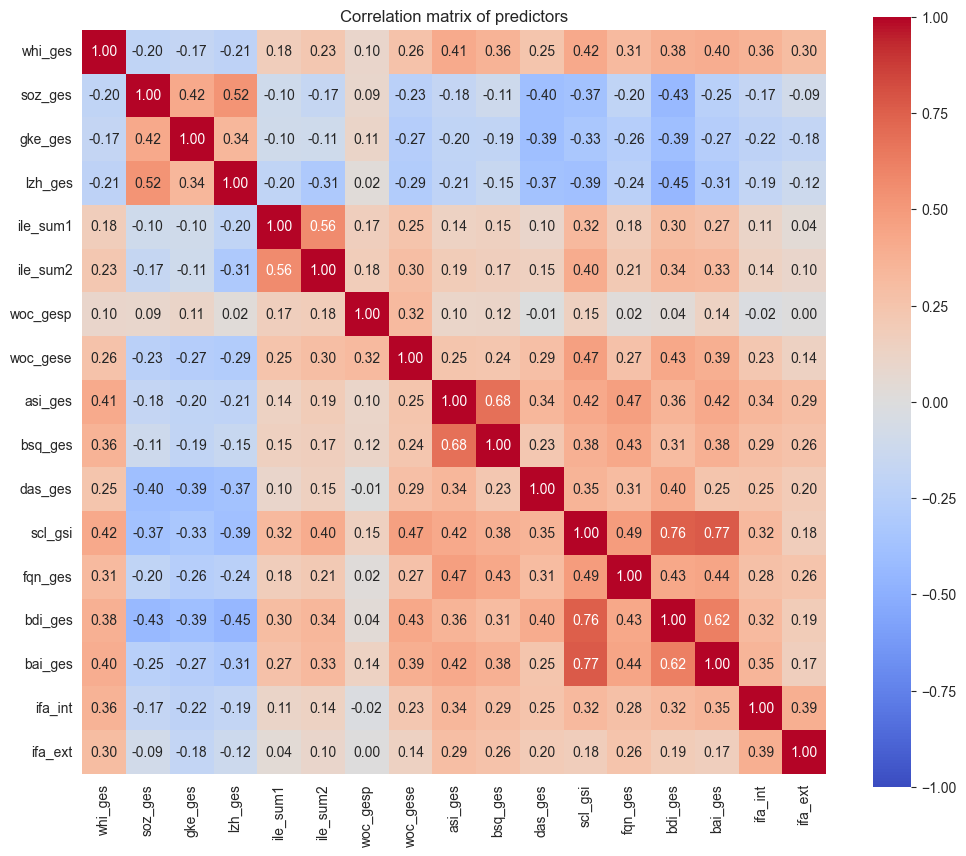

In [25]:
# heatmap of correlations

# fill " " with NA
data_pred = data_pred.replace(" ", np.nan)

corr = data_pred.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", square = True, vmin = -1, vmax = 1)
plt.title("Correlation matrix of predictors")
plt.show()

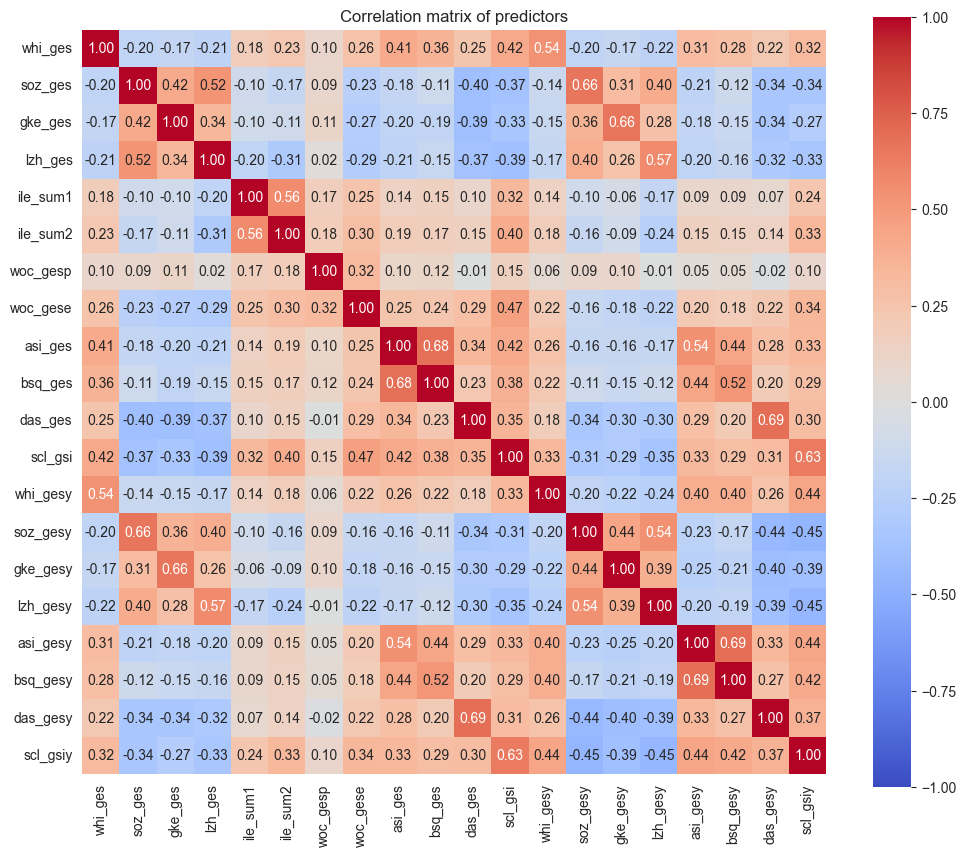

In [17]:
# heatmap

pred = data[predictors + predictors_y]

# fill " " with NA
pred = pred.replace(" ", np.nan)

corr = pred.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", square = True, vmin = -1, vmax = 1)
plt.title("Correlation matrix of predictors")
plt.show()

In [26]:
# get columns starting with a
a_cols = [col for col in data.columns if col.startswith('p')]
a_cols

['panikpp']

In [27]:
# get all column after hlisg
hlisg_index = data.columns.get_loc("hlisg") + 1
# get all columns after hlisg
hlisg_cols = data.columns[:hlisg_index]

for col in hlisg_cols:
    print(col)

code
okayt1
okayt2
teilt2
intnr
datum
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
s22
s23
s24
s24_kat
s25
s26
s27
s28
s29
s29kat
s29kat_k
s30
s30kat
s30kat_k
ses_kom
inter_y
s1y
s2y
s3y
s4y
s5y
s6y
s6ay
s6by
s7y
s8y
s9y
s10y
s11y
s12y
s13y
s14y
s15y
s16y
s17y
s18y
s19y
s20y
s21y
s22y
s23y
s24y
s24y_kat
s25y
s26y
s26ay
s27y
s27ky
s28y
s28ky
s29y
s29ky
s29ky_k
s30y
s30ky
s30ky_k
okayy
ses_komz
h71
h72
i1
i2
i3
j1
j2
k1
k2
k3
k4
k5
k6
k7
k8
k9
k10
k11
k12
k13
k14
k15
k16
k17
k18
k19
k20
k21
k22
k23
k24
k25
k26
k27
k28
k29
k30
k31
k32
k33
k34
k35
k36
k37
k38
ak1
ad1
ak2
ad2
ak3
ak4
ak5
ad3
ak6
ak7
ak8
ad4
ak9
ak10
ak11
ak12
ad5
as5
ak13
ak14
ak15
ak16
ad6
as6
ad7
as7
ad8
as8
ak17
ak18
ak19
ak20
ad9
as9
ak21
ak22
ak23
ak24
ad10
as10
ak25
ak26
ak27
ak28
ak29
ak30
ak31
ak32
ad11
as11
ak33
ak34
ak35
ak36
ak37
ak38
ak39
ak40
ad12
as12
ak41
ak42
ak43
ak44
ak45
ak46
ak47
ak48
ak49
ak50
ak51
ak52
ak53
ak54
ad13
as13
ad14
as14
ak55
ak56
ak57
ak58
ak59
ak60
ak61
ak62
a

In [ ]:
# are there items that start with same letters and are 14 in total?
# get all columns after hlisg
hlisg_index = data.columns.get_loc("hlisg") + 1

# get all columns after hlisg
hlisg_cols = data.columns[hlisg_index:]


In [28]:
data["ses_kom"]

0       2
1       3
2       2
3       1
4       2
       ..
1533    2
1534    2
1535    2
1536    2
1537    3
Name: ses_kom, Length: 1538, dtype: int64